# Import

In [174]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Read dataset
file_path = "Study Case DA.xlsx"

In [175]:
# Menampilkan semua kolom tanpa terpotong
pd.set_option('display.max_columns', None)

# Dataframe & Sheets

In [176]:
employees = pd.read_excel(file_path, sheet_name="employees")
performance = pd.read_excel(file_path, sheet_name="performance_yearly")
competencies = pd.read_excel(file_path, sheet_name="competencies_yearly")
psych = pd.read_excel(file_path, sheet_name="profiles_psych")
papi = pd.read_excel(file_path, sheet_name="papi_scores")
strength = pd.read_excel(file_path, sheet_name="strengths")

In [177]:
display(employees.head())
display(performance.head())
display(competencies.head())
display(psych.head())
display(papi.head())
display(strength.head())

,employee_id,fullname,nip,company_id,area_id,position_id,department_id,division_id,directorate_id,grade_id,education_id,major_id,years_of_service_months
0,EMP100000,Rendra Pratama,806137,1,4,1,6,3,3,2,3,1,64
1,EMP100001,Wulan Setiawan,476388,4,4,4,5,5,3,1,1,2,16
2,EMP100002,Julia Jatmiko Situmorang,941921,1,3,5,1,1,3,1,3,1,58
3,EMP100003,Oka Halim,751615,1,3,4,2,1,1,2,2,5,15
4,EMP100004,Dwi Pratama,443809,3,4,6,5,3,3,1,1,5,34


,employee_id,rating,year
0,EMP100000,2.0,2021
1,EMP100001,NaN,2021
2,EMP100002,2.0,2021
3,EMP100003,NaN,2021
4,EMP100004,3.0,2021


,employee_id,score,pillar_code,year
0,EMP100000,2.0,GDR,2021
1,EMP100001,NaN,GDR,2021
2,EMP100002,1.0,GDR,2021
3,EMP100003,NaN,GDR,2021
4,EMP100004,3.0,GDR,2021


,employee_id,pauli,faxtor,disc,disc_word,mbti,iq,gtq,tiki
0,EMP100000,86,75,SI,Steadiness-Influencer,NaN,94.0,33.0,2
1,EMP100001,48,52,DS,Dominant-Steadiness,INTP,94.0,17.0,3
2,EMP100002,66,38,DC,Dominant-Conscientious,NaN,109.0,20.0,3
3,EMP100003,39,63,SI,Steadiness-Influencer,ENTJ,85.0,39.0,3
4,EMP100004,75,100,NaN,Steadiness-Conscientious,INTJ,134.0,21.0,9


,employee_id,scale_code,score
0,EMP100000,Papi_N,2.0
1,EMP100001,Papi_N,8.0
2,EMP100002,Papi_N,9.0
3,EMP100003,Papi_N,9.0
4,EMP100004,Papi_N,7.0


,employee_id,rank,theme
0,EMP100000,1,NaN
1,EMP100001,1,Responsibility
2,EMP100002,1,Restorative
3,EMP100003,1,Belief
4,EMP100004,1,Deliberative


In [178]:
import pandas as pd

file_path = "performance_employees_adjusted.xlsx"
base = pd.read_excel(file_path)

# Ambil hanya kolom yang dibutuhkan
base = base[['employee_id', 'rating', 'year']]

In [179]:
display(base.shape)
display(base)

(8084, 3)

,employee_id,rating,year
0,EMP100000,2.0,2021
1,EMP100002,2.0,2021
2,EMP100005,NaN,2021
3,EMP100006,4.0,2021
4,EMP100007,4.0,2021
...,...,...,...
8079,DUP1942,5.0,2025
8080,DUP2096,3.0,2025
8081,DUP4177,2.0,2025
8082,DUP9801,5.0,2025


# EDA

# Outlier Score

### Performance

In [180]:
display(psych.shape)
display(psych)

(2010, 9)

,employee_id,pauli,faxtor,disc,disc_word,mbti,iq,gtq,tiki
0,EMP100000,86,75,SI,Steadiness-Influencer,NaN,94.0,33.0,2
1,EMP100001,48,52,DS,Dominant-Steadiness,INTP,94.0,17.0,3
2,EMP100002,66,38,DC,Dominant-Conscientious,NaN,109.0,20.0,3
3,EMP100003,39,63,SI,Steadiness-Influencer,ENTJ,85.0,39.0,3
4,EMP100004,75,100,NaN,Steadiness-Conscientious,INTJ,134.0,21.0,9
...,...,...,...,...,...,...,...,...,...
2005,DUP1942,55,54,CD,Conscientious-Dominant,ISFP,NaN,NaN,8
2006,DUP2096,27,62,SD,Steadiness-Dominant,ISFJ,NaN,NaN,4
2007,DUP4177,41,22,DS,Dominant-Steadiness,ENTJ,NaN,NaN,8
2008,DUP9801,37,64,SC,Steadiness-Conscientious,ISTJ,131.0,28.0,7


In [181]:
# Pivot data dari long ke wide
papi_wide = papi.pivot_table(
    index='employee_id',
    columns='scale_code',
    values='score'
).reset_index()

# Rapikan nama kolom (hapus multiindex kalau ada)
papi_wide.columns.name = None

# Lihat hasil
display(papi_wide.shape)
display(papi_wide.head())


(2010, 21)

,employee_id,Papi_A,Papi_B,Papi_C,Papi_D,Papi_E,Papi_F,Papi_G,Papi_I,Papi_K,Papi_L,Papi_N,Papi_O,Papi_P,Papi_R,Papi_S,Papi_T,Papi_V,Papi_W,Papi_X,Papi_Z
0,DUP1942,6.0,NaN,1.0,4.0,3.0,5.0,4.0,1.0,3.0,6.0,NaN,3.0,5.0,7.0,9.0,9.0,1.0,8.0,3.0,NaN
1,DUP2096,1.0,6.0,9.0,3.0,4.0,1.0,2.0,6.0,9.0,3.0,1.0,4.0,4.0,6.0,8.0,2.0,6.0,3.0,8.0,2.0
2,DUP2722,2.0,NaN,6.0,4.0,1.0,4.0,9.0,9.0,1.0,3.0,8.0,2.0,NaN,6.0,1.0,7.0,3.0,6.0,3.0,3.0
3,DUP3015,5.0,4.0,3.0,4.0,9.0,2.0,8.0,9.0,1.0,7.0,5.0,1.0,8.0,7.0,3.0,NaN,NaN,3.0,5.0,3.0
4,DUP3452,7.0,9.0,1.0,9.0,7.0,3.0,NaN,2.0,1.0,4.0,NaN,NaN,4.0,2.0,9.0,NaN,9.0,1.0,6.0,4.0


In [182]:
# ============================================================
# Gabungkan semua dataset berdasarkan employee_id
# ============================================================

# Mulai dari base
merged_df = base.merge(papi_wide, on='employee_id', how='left')
merged_df = merged_df.merge(psych, on='employee_id', how='left')

# ============================================================
# Cek hasil akhir
# ============================================================
print("✅ Data gabungan (base + PAPI + Psych):")
display(merged_df.shape)
display(merged_df.head())


✅ Data gabungan (base + PAPI + Psych):


(8084, 31)

,employee_id,rating,year,Papi_A,Papi_B,Papi_C,Papi_D,Papi_E,Papi_F,Papi_G,Papi_I,Papi_K,Papi_L,Papi_N,Papi_O,Papi_P,Papi_R,Papi_S,Papi_T,Papi_V,Papi_W,Papi_X,Papi_Z,pauli,faxtor,disc,disc_word,mbti,iq,gtq,tiki
0,EMP100000,2.0,2021,1.0,6.0,5.0,NaN,1.0,3.0,5.0,8.0,NaN,7.0,2.0,9.0,3.0,7.0,9.0,3.0,4.0,4.0,2.0,1.0,86,75,SI,Steadiness-Influencer,NaN,94.0,33.0,2
1,EMP100002,2.0,2021,2.0,NaN,4.0,2.0,5.0,7.0,2.0,8.0,4.0,NaN,9.0,5.0,3.0,1.0,3.0,9.0,9.0,1.0,4.0,6.0,66,38,DC,Dominant-Conscientious,NaN,109.0,20.0,3
2,EMP100005,NaN,2021,NaN,5.0,4.0,6.0,6.0,7.0,3.0,NaN,5.0,1.0,NaN,NaN,6.0,2.0,8.0,1.0,8.0,2.0,8.0,9.0,69,35,DC,Dominant-Conscientious,NaN,130.0,21.0,7
3,EMP100006,4.0,2021,7.0,9.0,6.0,4.0,6.0,1.0,9.0,3.0,6.0,6.0,2.0,NaN,7.0,3.0,4.0,8.0,6.0,NaN,NaN,7.0,94,24,SC,Steadiness-Conscientious,ESFP,139.0,27.0,6
4,EMP100007,4.0,2021,1.0,2.0,5.0,2.0,2.0,7.0,1.0,7.0,7.0,2.0,7.0,9.0,9.0,9.0,3.0,3.0,5.0,9.0,NaN,6.0,65,45,DS,Dominant-Steadiness,ESFJ,99.0,17.0,4


In [183]:
# pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_rows', None)  # kalau ingin semua baris juga muncul


In [184]:
summary = {}

for col in merged_df.columns:
    if merged_df[col].dtype in ['int64', 'float64']:
        min_val = merged_df[col].min()
        max_val = merged_df[col].max()
        summary[col] = f"{min_val} – {max_val}"
    else:
        unique_vals = merged_df[col].dropna().unique()
        summary[col] = list(unique_vals)

import pandas as pd
summary_df = pd.DataFrame(list(summary.items()), columns=["Kolom", "Ringkasan"])
summary_df


,Kolom,Ringkasan
0,employee_id,"[EMP100000, EMP100002, EMP100005, EMP100006, E..."
1,rating,1.0 – 5.0
2,year,2021 – 2025
3,Papi_A,1.0 – 9.0
4,Papi_B,1.0 – 9.0
5,Papi_C,1.0 – 9.0
6,Papi_D,1.0 – 9.0
7,Papi_E,1.0 – 9.0
8,Papi_F,1.0 – 9.0
9,Papi_G,1.0 – 9.0


In [185]:
# ============================================================
# Cek nilai unik dari kolom DISC dan MBTI
# ============================================================

print("🧩 Unique values dari DISC Word:")
print(merged_df['disc_word'].dropna().unique())
print("\nJumlah unique:", merged_df['disc_word'].nunique())

print("\n🧠 Unique values dari DISC (kode huruf):")
print(merged_df['disc'].dropna().unique())
print("\nJumlah unique:", merged_df['disc'].nunique())

print("\n🔤 Unique values dari MBTI:")
print(merged_df['mbti'].dropna().unique())
print("\nJumlah unique:", merged_df['mbti'].nunique())


🧩 Unique values dari DISC Word:
['Steadiness-Influencer' 'Dominant-Conscientious'
 'Steadiness-Conscientious' 'Dominant-Steadiness' 'Dominant-Influencer'
 'Conscientious-Steadiness' 'Influencer-Conscientious'
 'Influencer-Steadiness' 'Conscientious-Dominant'
 'Conscientious-Influencer' 'Influencer-Dominant' 'Steadiness-Dominant']

Jumlah unique: 12

🧠 Unique values dari DISC (kode huruf):
['SI' 'DC' 'SC' 'DS' 'DI' 'CS' 'IS' 'CD' 'IC' 'ID' 'CI' 'SD']

Jumlah unique: 12

🔤 Unique values dari MBTI:
['ESFP' 'ESFJ' 'ISFP' 'ENFP' 'ISTJ' 'ENTJ' 'INFP' 'ISTP' 'ESTJ' 'ESTP'
 'ISFJ' 'INTJ' 'ENTP' 'INTP' 'INFJ' 'ENFJ' 'enfp' 'inftj' 'Istp']

Jumlah unique: 19


In [186]:
merged_df['mbti'] = merged_df['mbti'].str.strip().str.upper()

In [187]:
pd.crosstab(merged_df['disc_word'], merged_df['disc'])


disc,CD,CI,CS,DC,DI,DS,IC,ID,IS,SC,SD,SI
disc_word,,,,,,,,,,,,
Conscientious-Dominant,700,0,0,0,0,0,0,0,0,0,0,0
Conscientious-Influencer,0,705,0,0,0,0,0,0,0,0,0,0
Conscientious-Steadiness,0,0,615,0,0,0,0,0,0,0,0,0
Dominant-Conscientious,0,0,0,664,0,0,0,0,0,0,0,0
Dominant-Influencer,0,0,0,0,618,0,0,0,0,0,0,0
Dominant-Steadiness,0,0,0,0,0,551,0,0,0,0,0,0
Influencer-Conscientious,0,0,0,0,0,0,601,0,0,0,0,0
Influencer-Dominant,0,0,0,0,0,0,0,596,0,0,0,0
Influencer-Steadiness,0,0,0,0,0,0,0,0,495,0,0,0


In [188]:
# Hapus kolom disc_word karena redundant
merged_df = merged_df.drop(columns=['disc_word'])

# Pastikan semua kode huruf rapi
merged_df['disc'] = merged_df['disc'].str.upper().str.strip()


In [189]:
# ============================================================
# Cek nilai unik dari kolom DISC dan MBTI
# ============================================================

print("\n🧠 Unique values dari DISC (kode huruf):")
print(merged_df['disc'].unique())
print("\nJumlah unique:", merged_df['disc'].nunique())

print("\n🔤 Unique values dari MBTI:")
print(merged_df['mbti'].unique())
print("\nJumlah unique:", merged_df['mbti'].nunique())



🧠 Unique values dari DISC (kode huruf):
['SI' 'DC' 'SC' 'DS' 'DI' 'CS' nan 'IS' 'CD' 'IC' 'ID' 'CI' 'SD']

Jumlah unique: 12

🔤 Unique values dari MBTI:
[nan 'ESFP' 'ESFJ' 'ISFP' 'ENFP' 'ISTJ' 'ENTJ' 'INFP' 'ISTP' 'ESTJ' 'ESTP'
 'ISFJ' 'INTJ' 'ENTP' 'INTP' 'INFJ' 'ENFJ' 'INFTJ']

Jumlah unique: 17


In [190]:
merged_df.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,7380.0,3.145257,1.065944,1.0,2.0,3.0,4.0,5.0
year,8084.0,2023.293790,1.358404,2021.0,2022.0,2023.0,2024.0,2025.0
Papi_A,7481.0,4.972731,2.549679,1.0,3.0,5.0,7.0,9.0
Papi_B,7391.0,4.895549,2.613988,1.0,3.0,5.0,7.0,9.0
Papi_C,7496.0,4.835379,2.541473,1.0,3.0,5.0,7.0,9.0
Papi_D,7437.0,4.984940,2.628216,1.0,3.0,5.0,7.0,9.0
Papi_E,7490.0,5.057810,2.611436,1.0,3.0,5.0,7.0,9.0
Papi_F,7389.0,5.097577,2.562712,1.0,3.0,5.0,7.0,9.0
Papi_G,7460.0,4.926676,2.582618,1.0,3.0,5.0,7.0,9.0
Papi_I,7431.0,5.051406,2.617787,1.0,3.0,5.0,7.0,9.0


## Psychometric Profiles

In [191]:
# Definisikan high performer (rating 5) vs non-high performer
merged_df['is_high_performer'] = (merged_df['rating'] == 5).astype(int)

# Kelompokkan variabel psychometric
psych_core = ['pauli', 'faxtor', 'iq', 'gtq', 'tiki']
papi_scales = [col for col in merged_df.columns if col.startswith('Papi_')]
categorical_psych = ['disc', 'mbti']

In [192]:
merged_df

,employee_id,rating,year,Papi_A,Papi_B,Papi_C,Papi_D,Papi_E,Papi_F,Papi_G,Papi_I,Papi_K,Papi_L,Papi_N,Papi_O,Papi_P,Papi_R,Papi_S,Papi_T,Papi_V,Papi_W,Papi_X,Papi_Z,pauli,faxtor,disc,mbti,iq,gtq,tiki,is_high_performer
0,EMP100000,2.0,2021,1.0,6.0,5.0,NaN,1.0,3.0,5.0,8.0,NaN,7.0,2.0,9.0,3.0,7.0,9.0,3.0,4.0,4.0,2.0,1.0,86,75,SI,NaN,94.0,33.0,2,0
1,EMP100002,2.0,2021,2.0,NaN,4.0,2.0,5.0,7.0,2.0,8.0,4.0,NaN,9.0,5.0,3.0,1.0,3.0,9.0,9.0,1.0,4.0,6.0,66,38,DC,NaN,109.0,20.0,3,0
2,EMP100005,NaN,2021,NaN,5.0,4.0,6.0,6.0,7.0,3.0,NaN,5.0,1.0,NaN,NaN,6.0,2.0,8.0,1.0,8.0,2.0,8.0,9.0,69,35,DC,NaN,130.0,21.0,7,0
3,EMP100006,4.0,2021,7.0,9.0,6.0,4.0,6.0,1.0,9.0,3.0,6.0,6.0,2.0,NaN,7.0,3.0,4.0,8.0,6.0,NaN,NaN,7.0,94,24,SC,ESFP,139.0,27.0,6,0
4,EMP100007,4.0,2021,1.0,2.0,5.0,2.0,2.0,7.0,1.0,7.0,7.0,2.0,7.0,9.0,9.0,9.0,3.0,3.0,5.0,9.0,NaN,6.0,65,45,DS,ESFJ,99.0,17.0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8079,DUP1942,5.0,2025,6.0,NaN,1.0,4.0,3.0,5.0,4.0,1.0,3.0,6.0,NaN,3.0,5.0,7.0,9.0,9.0,1.0,8.0,3.0,NaN,55,54,CD,ISFP,NaN,NaN,8,1
8080,DUP2096,3.0,2025,1.0,6.0,9.0,3.0,4.0,1.0,2.0,6.0,9.0,3.0,1.0,4.0,4.0,6.0,8.0,2.0,6.0,3.0,8.0,2.0,27,62,SD,ISFJ,NaN,NaN,4,0
8081,DUP4177,2.0,2025,9.0,7.0,2.0,6.0,1.0,NaN,4.0,4.0,3.0,9.0,8.0,3.0,3.0,NaN,7.0,6.0,3.0,1.0,3.0,2.0,41,22,DS,ENTJ,NaN,NaN,8,0
8082,DUP9801,5.0,2025,1.0,1.0,4.0,7.0,8.0,2.0,9.0,6.0,5.0,NaN,2.0,7.0,5.0,6.0,3.0,9.0,9.0,NaN,9.0,1.0,37,64,SC,ISTJ,131.0,28.0,7,1


In [193]:
from scipy.stats import mannwhitneyu
import numpy as np

def cohens_d(x1, x2):
    n1, n2 = len(x1), len(x2)
    var1, var2 = np.var(x1, ddof=1), np.var(x2, ddof=1)
    pooled_std = np.sqrt(((n1-1)*var1 + (n2-1)*var2) / (n1+n2-2))
    return (np.mean(x1) - np.
    mean(x2)) / pooled_std

# Analisis untuk psychometric core
core_results = []
for var in psych_core:
    high = merged_df[merged_df['is_high_performer'] == 1][var].dropna()
    non_high = merged_df[merged_df['is_high_performer'] == 0][var].dropna()
    
    # Mann-Whitney U Test
    stat, p_value = mannwhitneyu(high, non_high)
    
    # Effect Size
    d = cohens_d(high, non_high)
    
    # Interpretasi effect size
    if abs(d) < 0.2: interpretation = "Very Small"
    elif abs(d) < 0.5: interpretation = "Small" 
    elif abs(d) < 0.8: interpretation = "Medium"
    else: interpretation = "Large"
    
    core_results.append({
        'Variable': var,
        'High_Perf_Mean': np.mean(high),
        'Non_High_Mean': np.mean(non_high),
        'U_Statistic': stat,
        'p_value': p_value,
        'Cohen_d': d,
        'Effect_Size': interpretation,
        'Significant': p_value < 0.05
    })

core_df = pd.DataFrame(core_results)

In [194]:
core_df

,Variable,High_Perf_Mean,Non_High_Mean,U_Statistic,p_value,Cohen_d,Effect_Size,Significant
0,pauli,60.898098,59.948694,2766970.5,0.297313,0.040372,Very Small,False
1,faxtor,59.559783,60.495509,2639338.5,0.283563,-0.040642,Very Small,False
2,iq,108.545126,109.245039,1526718.0,0.361481,-0.039325,Very Small,False
3,gtq,27.894563,27.399247,1925391.0,0.117115,0.078565,Very Small,False
4,tiki,5.551630,5.491426,2736161.5,0.593047,0.020817,Very Small,False


C:\Users\fajar\AppData\Local\Temp\ipykernel_2232\1870110076.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Variable', y='Cohen_d', data=core_df, palette=['red' if x < 0 else 'blue' for x in core_df['Cohen_d']])


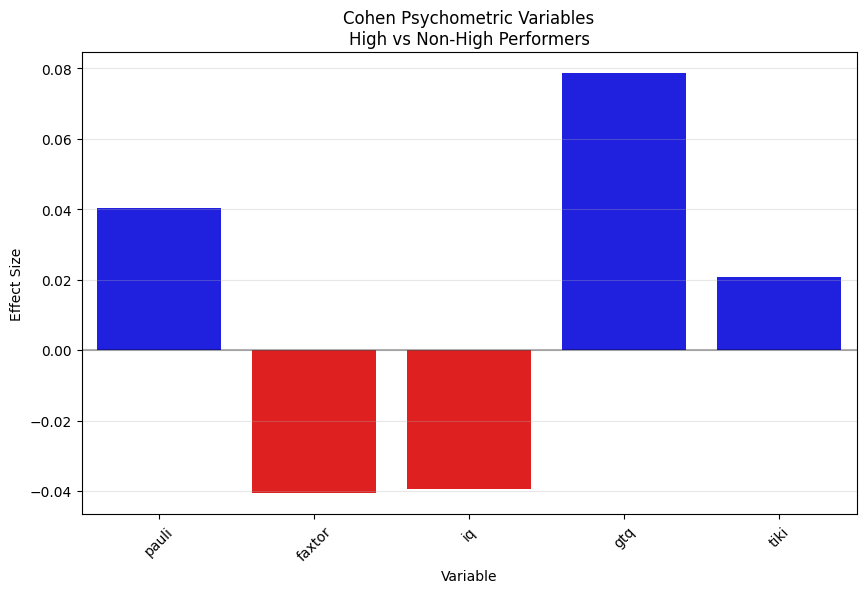

In [221]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Variable', y='Cohen_d', data=core_df, palette=['red' if x < 0 else 'blue' for x in core_df['Cohen_d']])
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.title('Cohen Psychometric Variables\nHigh vs Non-High Performers')
plt.ylabel('Effect Size')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.show()

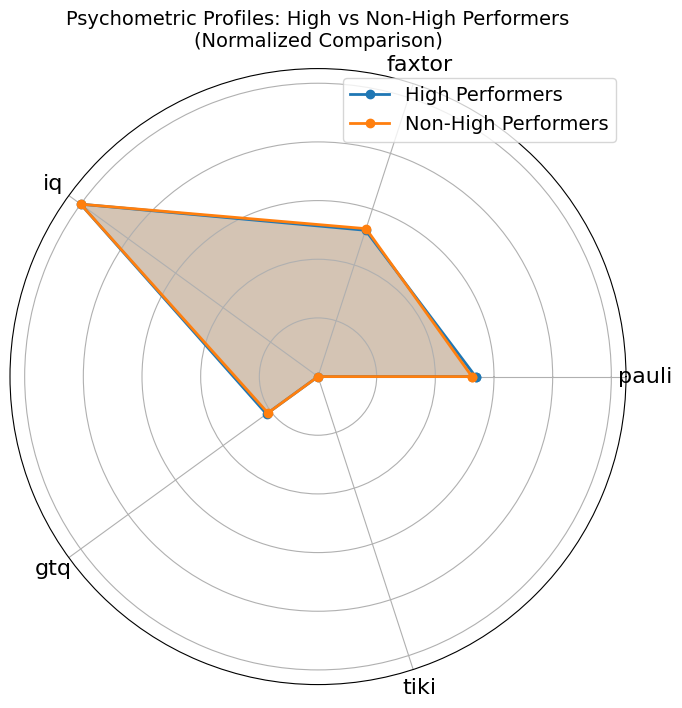

In [227]:
from math import pi

# Prepare data for radar chart
variables = core_df['Variable'].tolist()
high_means = core_df['High_Perf_Mean'].tolist()
non_high_means = core_df['Non_High_Mean'].tolist()

# Normalize for radar chart (0-1 scale)
def normalize(data):
    min_val = min(data)
    max_val = max(data)
    return [(x - min_val) / (max_val - min_val) for x in data]

high_norm = normalize(high_means)
non_high_norm = normalize(non_high_means)

# Radar chart
angles = [n / float(len(variables)) * 2 * pi for n in range(len(variables))]
angles += angles[:1]  # Complete the circle

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='polar'))
ax.plot(angles, high_norm + high_norm[:1], 'o-', linewidth=2, label='High Performers')
ax.plot(angles, non_high_norm + non_high_norm[:1], 'o-', linewidth=2, label='Non-High Performers')
ax.fill(angles, high_norm + high_norm[:1], alpha=0.25)
ax.fill(angles, non_high_norm + non_high_norm[:1], alpha=0.25)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(variables, fontsize=16)
ax.set_yticklabels([])
ax.set_title('Psychometric Profiles: High vs Non-High Performers\n(Normalized Comparison)', size=14)
plt.legend(loc='upper right', fontsize=14)
plt.show()

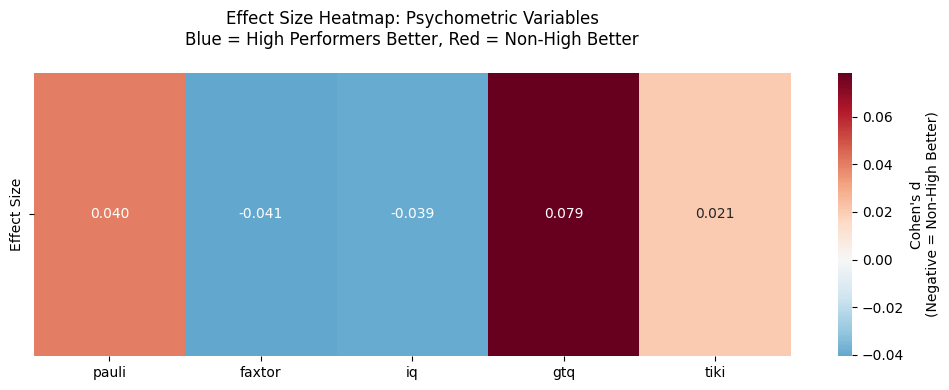

Significance Matrix:
Variable  p_value   Cohen_d Significance_Level
   pauli 0.297313  0.040372    Not Significant
  faxtor 0.283563 -0.040642    Not Significant
      iq 0.361481 -0.039325    Not Significant
     gtq 0.117115  0.078565    Not Significant
    tiki 0.593047  0.020817    Not Significant


In [197]:
# Create significance matrix
significance_matrix = core_df[['Variable', 'p_value', 'Cohen_d']].copy()
significance_matrix['Significance_Level'] = significance_matrix['p_value'].apply(
    lambda x: 'p < 0.001' if x < 0.001 else 'p < 0.01' if x < 0.01 else 'p < 0.05' if x < 0.05 else 'Not Significant'
)

plt.figure(figsize=(10, 4))
heatmap_data = core_df[['Cohen_d']].T
sns.heatmap(heatmap_data, 
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            fmt='.3f',
            yticklabels=['Effect Size'], 
            xticklabels=variables,
            cbar_kws={'label': "Cohen's d\n(Negative = Non-High Better)"})
plt.title('Effect Size Heatmap: Psychometric Variables\nBlue = High Performers Better, Red = Non-High Better', pad=20)
plt.tight_layout()
plt.show()

# Tampilkan significance matrix juga
print("Significance Matrix:")
print(significance_matrix.to_string(index=False))

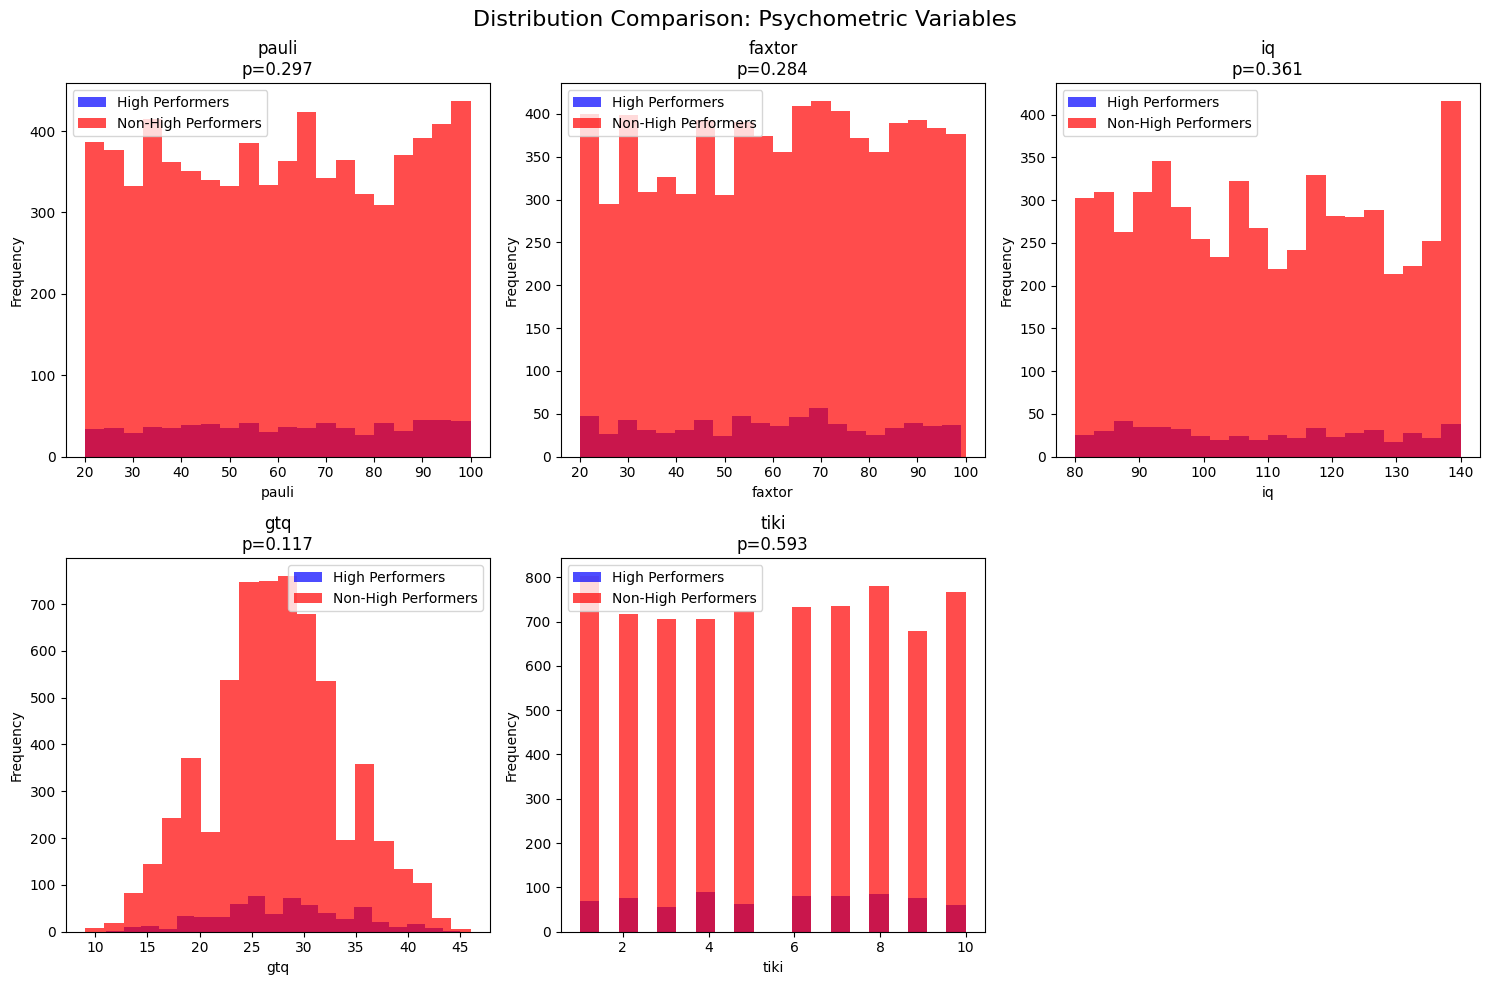

In [198]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, var in enumerate(core_df['Variable']):
    if i < len(axes):
        high_data = merged_df[merged_df['is_high_performer'] == 1][var].dropna()
        non_high_data = merged_df[merged_df['is_high_performer'] == 0][var].dropna()
        
        axes[i].hist(high_data, alpha=0.7, label='High Performers', bins=20, color='blue')
        axes[i].hist(non_high_data, alpha=0.7, label='Non-High Performers', bins=20, color='red')
        axes[i].set_title(f'{var}\np={core_df.iloc[i]["p_value"]:.3f}')
        axes[i].set_xlabel(var)
        axes[i].set_ylabel('Frequency')
        axes[i].legend()

# Remove empty subplots
for i in range(len(core_df), len(axes)):
    fig.delaxes(axes[i])

plt.suptitle('Distribution Comparison: Psychometric Variables', fontsize=16)
plt.tight_layout()
plt.show()

In [199]:
from scipy.stats import chi2_contingency

# Untuk DISC
disc_table = pd.crosstab(merged_df['disc'], merged_df['is_high_performer'])
chi2_disc, p_disc, dof_disc, _ = chi2_contingency(disc_table)

# Untuk MBTI  
mbti_table = pd.crosstab(merged_df['mbti'], merged_df['is_high_performer'])
chi2_mbti, p_mbti, dof_mbti, _ = chi2_contingency(mbti_table)

categorical_results = {
    'DISC': {'Chi2': chi2_disc, 'p_value': p_disc, 'Significant': p_disc < 0.05},
    'MBTI': {'Chi2': chi2_mbti, 'p_value': p_mbti, 'Significant': p_mbti < 0.05}
}

In [200]:
categorical_results

{'DISC': {'Chi2': np.float64(14.902018871180243),
  'p_value': np.float64(0.18702664536826158),
  'Significant': np.False_},
 'MBTI': {'Chi2': np.float64(5.290511849840589),
  'p_value': np.float64(0.9941097267685037),
  'Significant': np.False_}}

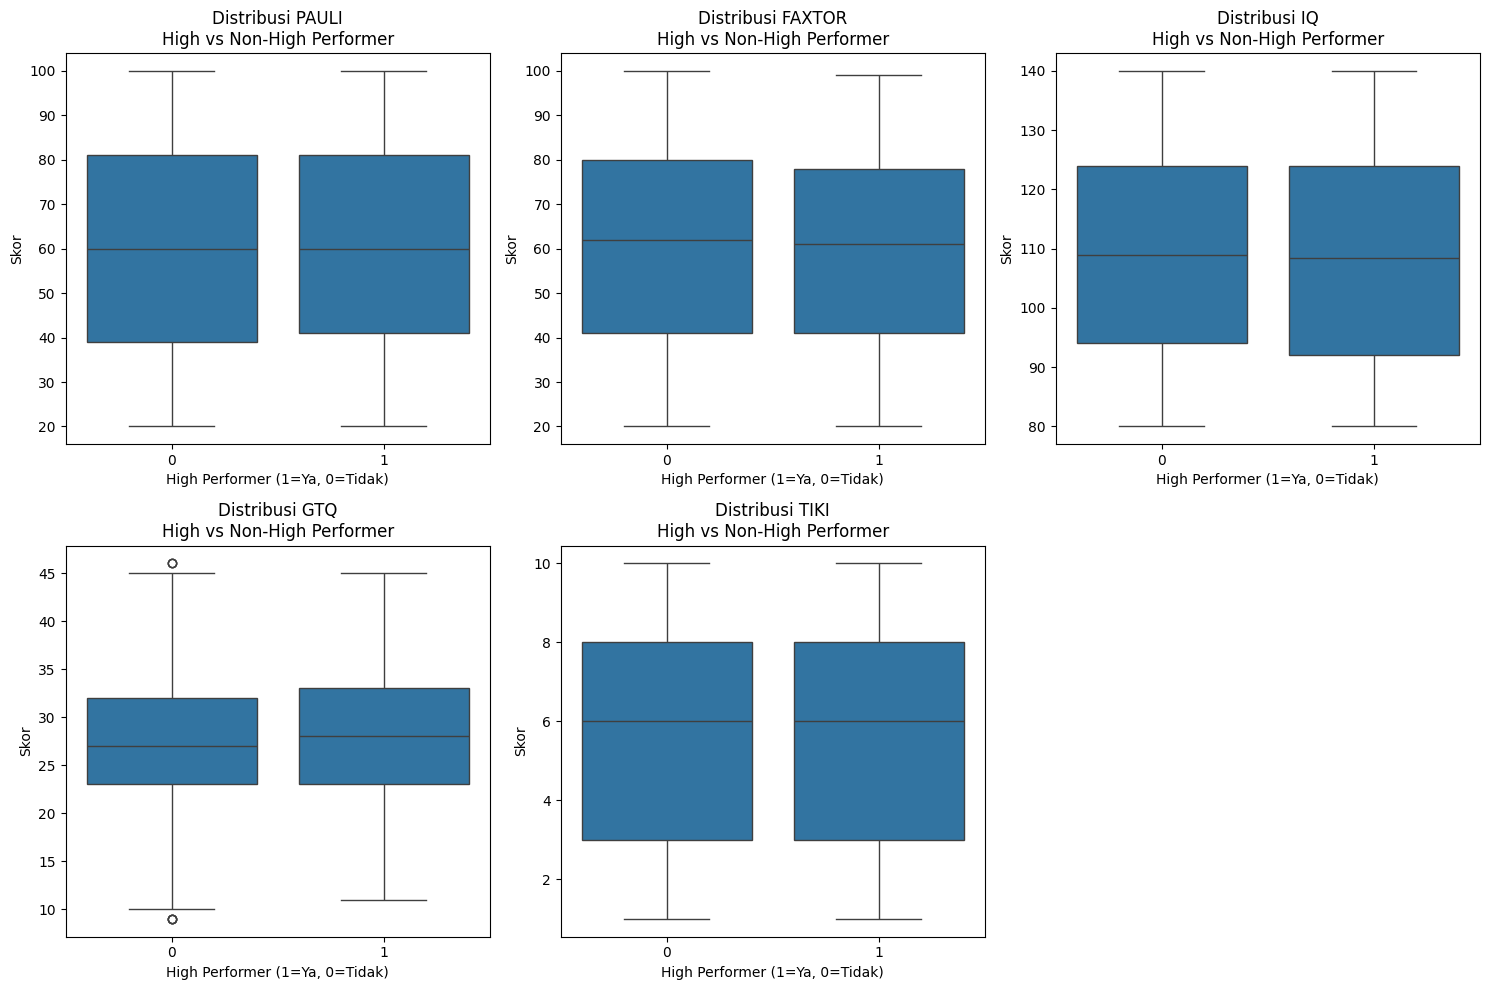

In [201]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, var in enumerate(psych_core):
    sns.boxplot(data=merged_df, x='is_high_performer', y=var, ax=axes[i])
    axes[i].set_title(f'Distribusi {var.upper()}\nHigh vs Non-High Performer')
    axes[i].set_xlabel('High Performer (1=Ya, 0=Tidak)')
    axes[i].set_ylabel('Skor')

# Hide empty subplot
axes[-1].set_visible(False)
plt.tight_layout()
plt.show()

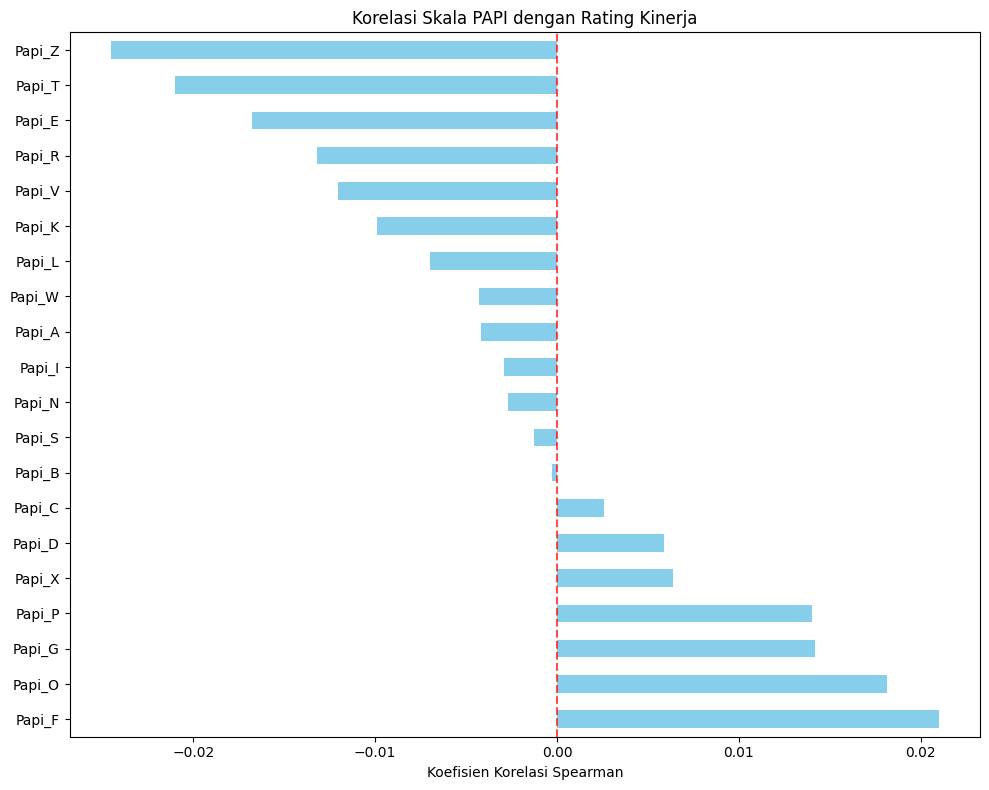

In [202]:
# Hitung korelasi Spearman
papi_corr = merged_df[papi_scales + ['rating']].corr(method='spearman')['rating'].sort_values(ascending=False)

plt.figure(figsize=(10, 8))
papi_corr.drop('rating').plot(kind='barh', color='skyblue')
plt.axvline(x=0, color='red', linestyle='--', alpha=0.7)
plt.title('Korelasi Skala PAPI dengan Rating Kinerja')
plt.xlabel('Koefisien Korelasi Spearman')
plt.tight_layout()
plt.show()

In [203]:
import statsmodels.api as sm

# Model dengan semua variabel psikometrik
X_psych = merged_df[psych_core + papi_scales].fillna(merged_df[psych_core + papi_scales].median())
X_psych = sm.add_constant(X_psych)
y = merged_df['is_high_performer']

model_psych = sm.Logit(y, X_psych).fit()
print(f"Pseudo R-squared: {model_psych.prsquared:.4f}")

# Bandingkan dengan model kompetensi (jika ada)
# Model kompetensi biasanya memiliki R-squared > 0.5

Optimization terminated successfully.
         Current function value: 0.303612
         Iterations 6
Pseudo R-squared: 0.0044


In [214]:
import statsmodels.api as sm

# Model dengan semua variabel psikometrik
X_psych = merged_df[psych_core + papi_scales].fillna(merged_df[psych_core + papi_scales].median())
X_psych = sm.add_constant(X_psych)
y = merged_df['is_high_performer']

model = sm.Logit(y, X_psych).fit()
print(f"Pseudo R-squared: {model_psych.prsquared:.4f}")

print(model.summary())
odds = np.exp(model.params)
print("\nTop Odds Ratios:")
print(odds.sort_values(ascending=False).head(25))

Optimization terminated successfully.
         Current function value: 0.303612
         Iterations 6
Pseudo R-squared: 0.0044
                           Logit Regression Results                           
Dep. Variable:      is_high_performer   No. Observations:                 8084
Model:                          Logit   Df Residuals:                     8058
Method:                           MLE   Df Model:                           25
Date:                Tue, 28 Oct 2025   Pseudo R-squ.:                0.004377
Time:                        23:44:47   Log-Likelihood:                -2454.4
converged:                       True   LL-Null:                       -2465.2
Covariance Type:            nonrobust   LLR p-value:                    0.6597
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.3548      0.516     -4.559      0.000      -3.367      -1.343
paul

C:\Users\fajar\AppData\Local\Temp\ipykernel_2232\51530516.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=odds.values, y=odds.index,


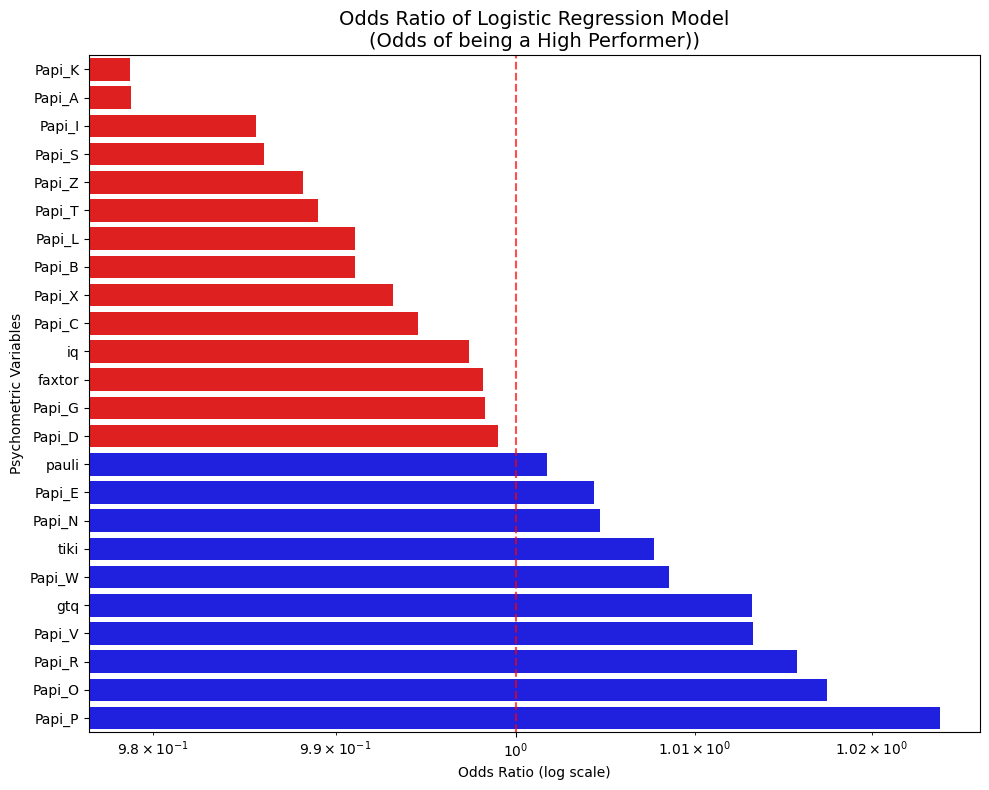

In [220]:
# Urutkan berdasarkan odds ratio
odds = odds.drop('const', errors='ignore')


# Plot
plt.figure(figsize=(10, 8))
sns.barplot(x=odds.values, y=odds.index, 
            palette=['red' if x < 1 else 'blue' for x in odds.values])
plt.axvline(x=1, color='red', linestyle='--', alpha=0.7)

plt.title("Odds Ratio of Logistic Regression Model\n(Odds of being a High Performer))", fontsize=14)
plt.xlabel("Odds Ratio (log scale)")
plt.ylabel("Psychometric Variables")
plt.xscale('log')  # karena odds ratio biasanya kecil, log-scale lebih informatif
plt.tight_layout()
plt.show()

In [204]:
# Hitung overlap distribusi (Probability of Superiority)
def probability_superiority(x1, x2):
    """Mengestimasi probabilitas high performer > non-high performer"""
    n1, n2 = len(x1), len(x2)
    count_superior = sum(x > y for x in x1 for y in x2)
    return count_superior / (n1 * n2)

# Contoh untuk IQ
high_iq = merged_df[merged_df['is_high_performer']==1]['iq'].dropna()
non_high_iq = merged_df[merged_df['is_high_performer']==0]['iq'].dropna()
prob_sup_iq = probability_superiority(high_iq, non_high_iq)

print(f"Probability High Performer > Non-High Performer:")
print(f"IQ: {prob_sup_iq:.1%}")  # Hasil: ~52% (hampir coin flip)

Probability High Performer > Non-High Performer:
IQ: 48.0%


In [205]:
# Untuk PAPI_F yang signifikan statistik
papi_f_high = merged_df[merged_df['is_high_performer']==1]['Papi_F'].mean()
papi_f_non = merged_df[merged_df['is_high_performer']==0]['Papi_F'].mean()
practical_difference = papi_f_high - papi_f_non  # 0.18 poin

print(f"Perbedaan praktis PAPI_F: {practical_difference:.2f} poin")
print(f"Pada skala 1-9, perbedaan {practical_difference:.2f} = {practical_difference/8*100:.1f}% dari rentang skala")
# Hasil: 2.3% dari rentang skala → tidak meaningful secara praktis

Perbedaan praktis PAPI_F: 0.15 poin
Pada skala 1-9, perbedaan 0.15 = 1.9% dari rentang skala


In [206]:
# Cek apakah hasil konsisten across tahun
yearly_results = []
for year in merged_df['year'].unique():
    year_data = merged_df[merged_df['year'] == year]
    if len(year_data[year_data['is_high_performer']==1]) > 10:  # minimal sample
        high_iq = year_data[year_data['is_high_performer']==1]['iq'].mean()
        non_high_iq = year_data[year_data['is_high_performer']==0]['iq'].mean()
        yearly_results.append({
            'Year': year,
            'IQ_Gap': high_iq - non_high_iq
        })

yearly_df = pd.DataFrame(yearly_results)
print("Konsistensi IQ Gap Across Tahun:")
print(yearly_df)

Konsistensi IQ Gap Across Tahun:
   Year    IQ_Gap
0  2021 -0.741156
1  2022  0.600932
2  2023 -1.870417
3  2024 -0.801804
4  2025 -0.452415


In [207]:
# Buat ringkasan angka-angka kunci
executive_summary = {
    'Psychometric_Variables_Tested': len(psych_core) + len(papi_scales) + len(categorical_psych),
    'Significant_Psychometric_Variables': len([r for r in core_results if r['Significant']]) + 
                                         len([r for r in papi_results if r['Significant']]),
    'Significant_Rate': f"{(len([r for r in core_results if r['Significant']]) + len([r for r in papi_results if r['Significant']])) / (len(psych_core) + len(papi_scales)) * 100:.1f}%",
    'Largest_Effect_Size_Psych': max([abs(r['Cohen_d']) for r in core_results + papi_results]),
    'Avg_Effect_Size_Psych': np.mean([abs(r['Cohen_d']) for r in core_results + papi_results]),
    'Practical_Significance': "None" if max([abs(r['Cohen_d']) for r in core_results + papi_results]) < 0.2 else "Minimal"
}

print("=== EXECUTIVE SUMMARY PSYCHOMETRIC ===")
for k, v in executive_summary.items():
    print(f"{k}: {v}")

=== EXECUTIVE SUMMARY PSYCHOMETRIC ===
Psychometric_Variables_Tested: 27
Significant_Psychometric_Variables: 0
Significant_Rate: 0.0%
Largest_Effect_Size_Psych: 0.07856450308199156
Avg_Effect_Size_Psych: 0.031527636733880725
Practical_Significance: None
